# House Price Prediction Using Multiple Regression Models

This notebook demonstrates the use of multiple regression techniques to predict house prices using the Boston Housing dataset with **statsmodels** library.

## Models Implemented:
- **Linear Regression (OLS)** - Ordinary Least Squares
- **Polynomial Regression** - Captures non-linear relationships
- **Ridge Regression** - L2 regularization
- **Lasso Regression** - L1 regularization for feature selection

## Evaluation Metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score

## 1. Import Libraries

In [3]:
# Core libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Statsmodels
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

# For polynomial features and preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")
print(f"Statsmodels version: {sm.__version__}")

Libraries imported successfully!
Statsmodels version: 0.14.6


## 2. Load and Explore the Dataset

In [4]:
# Define column names for Boston Housing dataset
column_names = [
    'CRIM',      # Per capita crime rate by town
    'ZN',        # Proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',     # Proportion of non-retail business acres per town
    'CHAS',      # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    'NOX',       # Nitric oxides concentration (parts per 10 million)
    'RM',        # Average number of rooms per dwelling
    'AGE',       # Proportion of owner-occupied units built prior to 1940
    'DIS',       # Weighted distances to five Boston employment centres
    'RAD',       # Index of accessibility to radial highways
    'TAX',       # Full-value property-tax rate per $10,000
    'PTRATIO',   # Pupil-teacher ratio by town
    'B',         # 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents
    'LSTAT',     # % lower status of the population
    'MEDV'       # Median value of owner-occupied homes in $1000s (TARGET)
]

# Load the dataset
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=column_names)

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (506, 14)

First 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Basic statistics
print("Dataset Statistics:")
df.describe().round(2)

Dataset Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Total missing values: 0


## 3. Exploratory Data Analysis (EDA)

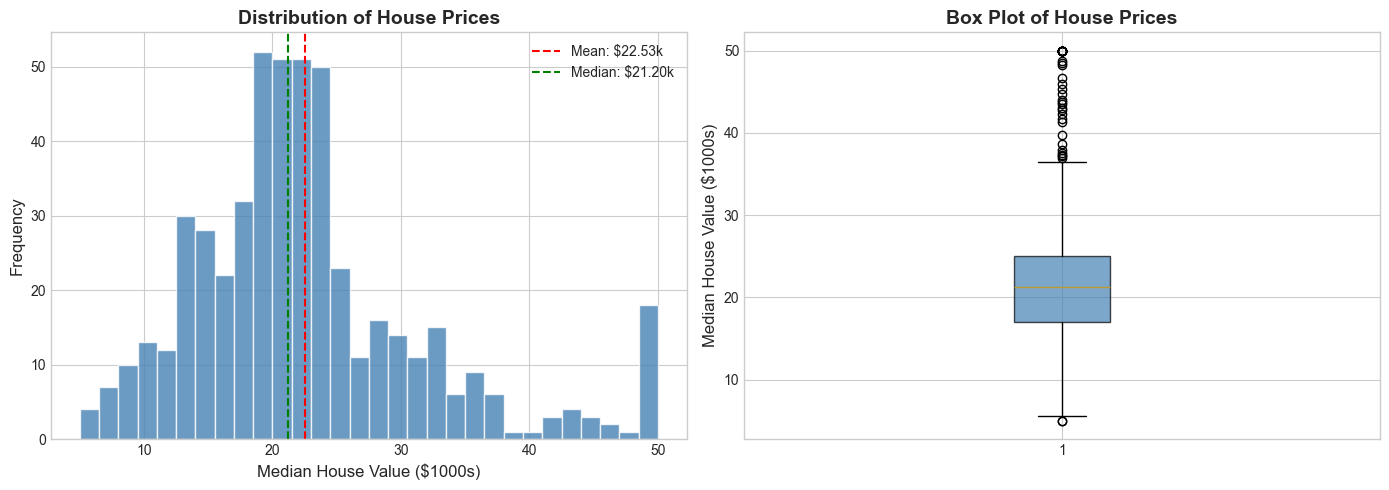

In [7]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['MEDV'], bins=30, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Median House Value ($1000s)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].axvline(df['MEDV'].mean(), color='red', linestyle='--', label=f'Mean: ${df["MEDV"].mean():.2f}k')
axes[0].axvline(df['MEDV'].median(), color='green', linestyle='--', label=f'Median: ${df["MEDV"].median():.2f}k')
axes[0].legend()

# Box plot
axes[1].boxplot(df['MEDV'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7))
axes[1].set_ylabel('Median House Value ($1000s)', fontsize=12)
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

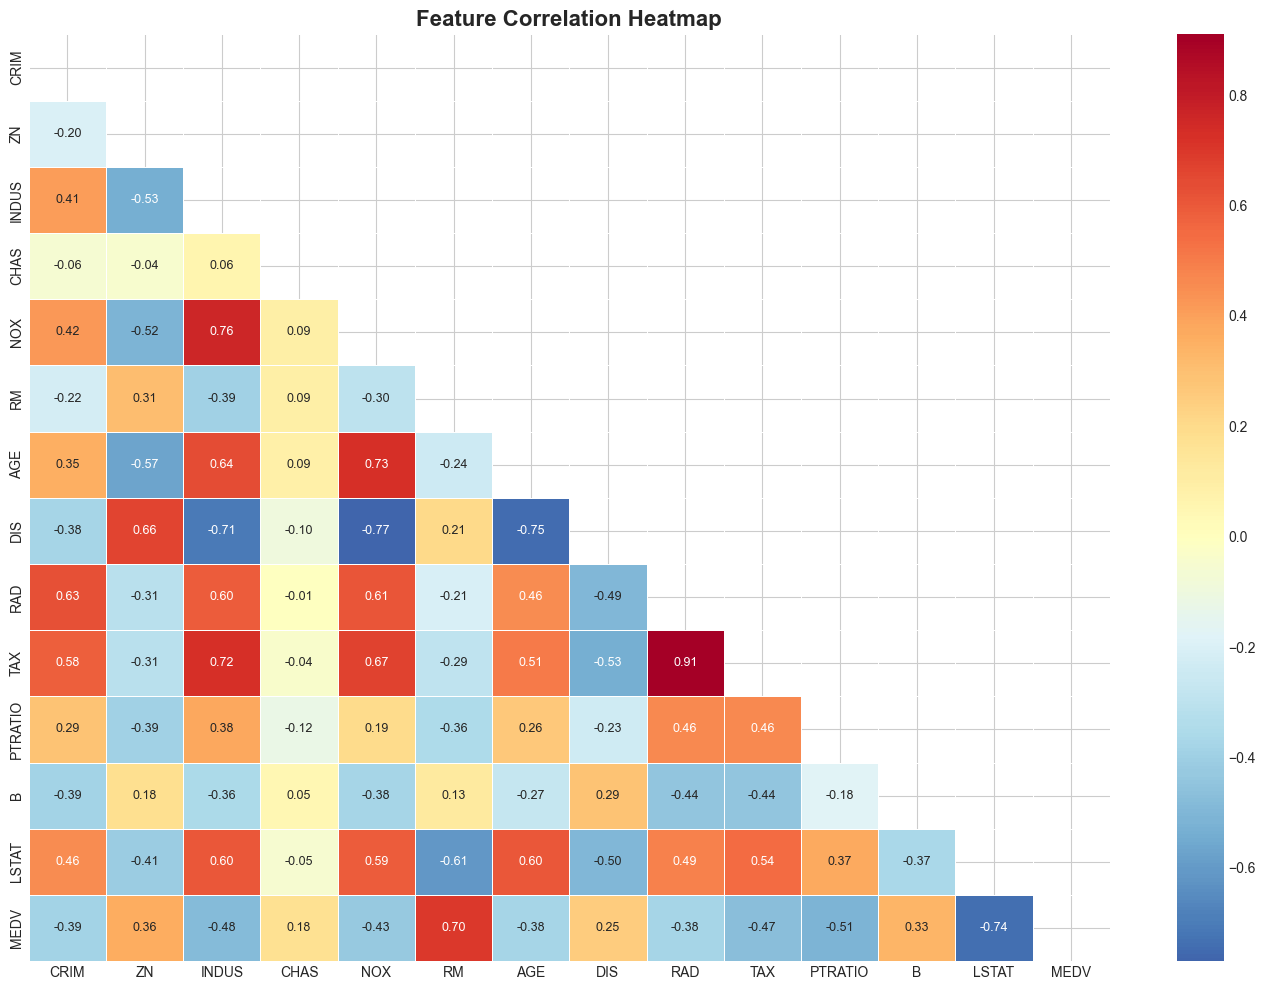


Correlation with Target (MEDV):
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [8]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
            center=0, fmt='.2f', linewidths=0.5, annot_kws={'size': 9})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Print correlations with target
print("\nCorrelation with Target (MEDV):")
print(correlation_matrix['MEDV'].sort_values(ascending=False))

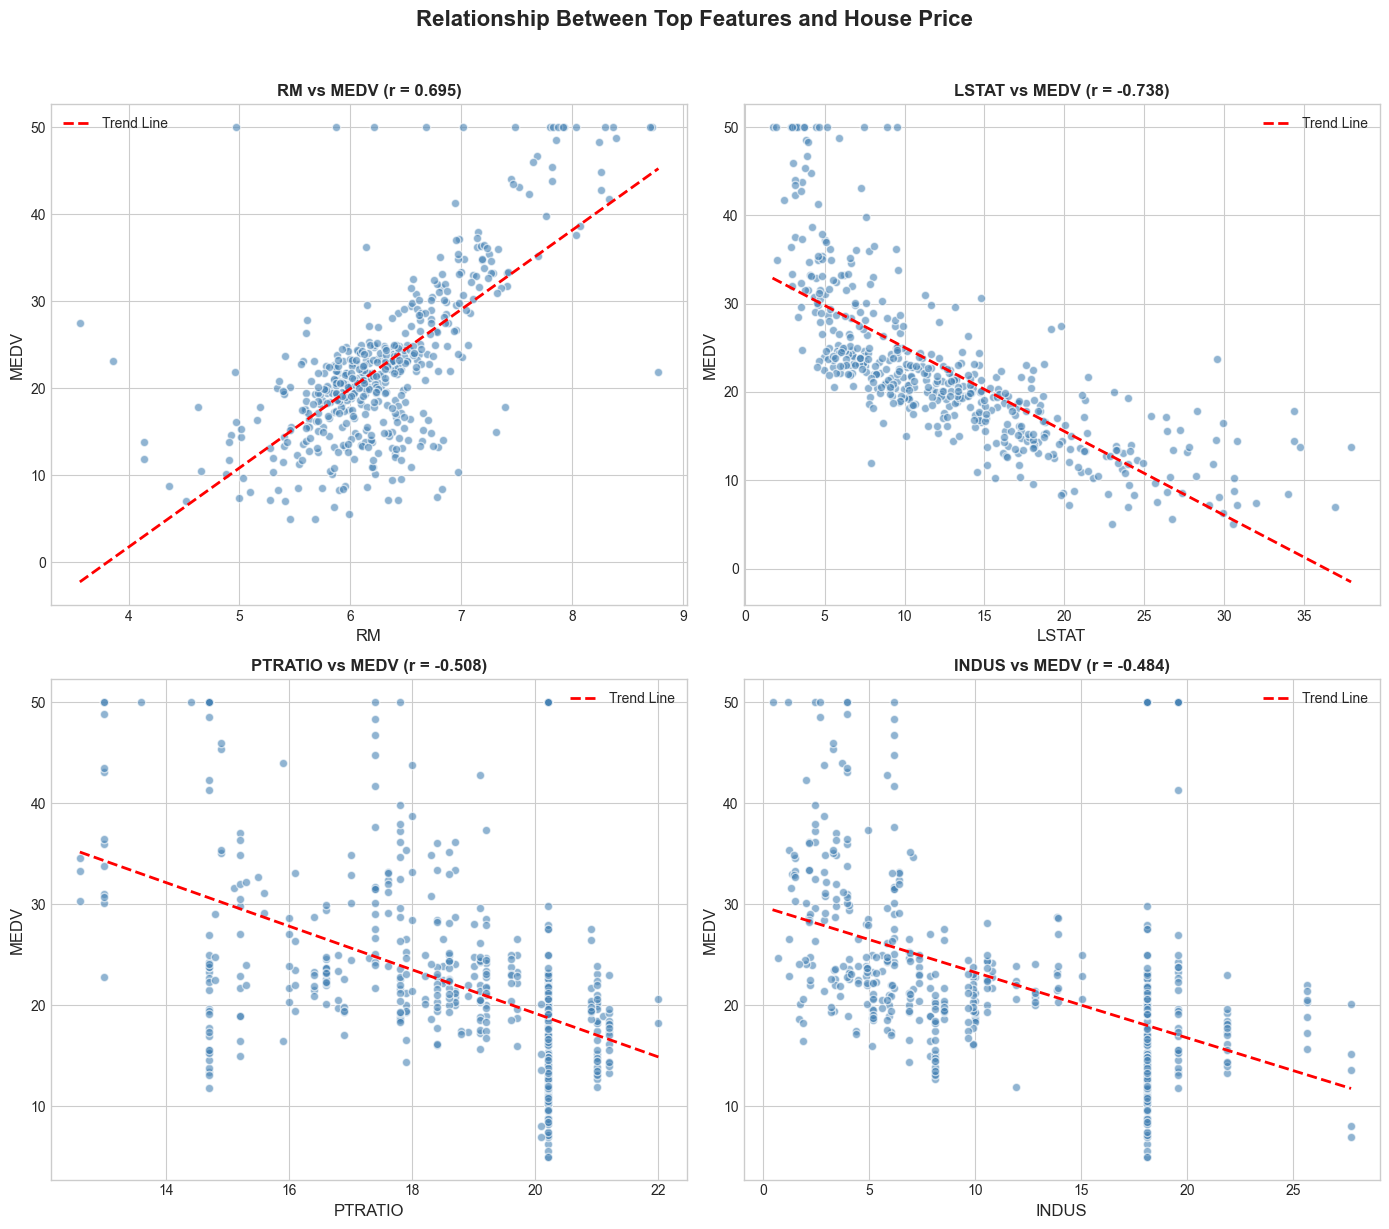

In [9]:
# Scatter plots of top correlated features
top_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df['MEDV'], alpha=0.6, color='steelblue', edgecolor='white')
    
    # Add trend line
    z = np.polyfit(df[feature], df['MEDV'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature].sort_values(), p(df[feature].sort_values()), 
                 color='red', linestyle='--', linewidth=2, label='Trend Line')
    
    corr = df[feature].corr(df['MEDV'])
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('MEDV', fontsize=12)
    axes[i].set_title(f'{feature} vs MEDV (r = {corr:.3f})', fontsize=12, fontweight='bold')
    axes[i].legend()

plt.suptitle('Relationship Between Top Features and House Price', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_relationships.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Data Preprocessing

In [10]:
# Separate features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (506, 13)
Target shape: (506,)


In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 404 samples
Test set: 102 samples


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)

print("Features scaled successfully!")
print(f"\nScaled training data - Mean: {X_train_scaled.values.mean():.6f}, Std: {X_train_scaled.values.std():.4f}")

Features scaled successfully!

Scaled training data - Mean: -0.000000, Std: 1.0000


## 5. Helper Functions

In [13]:
def calculate_metrics(y_true, y_pred):
    """Calculate MAE, MSE, RMSE, and R²."""
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display evaluation metrics."""
    metrics = calculate_metrics(y_true, y_pred)
    
    print(f"\n{'='*50}")
    print(f"{model_name} Results:")
    print(f"{'='*50}")
    print(f"Mean Absolute Error (MAE): ${metrics['MAE']:.4f}k")
    print(f"Mean Squared Error (MSE):  {metrics['MSE']:.4f}")
    print(f"Root MSE (RMSE):           ${metrics['RMSE']:.4f}k")
    print(f"R² Score:                  {metrics['R²']:.4f} ({metrics['R²']*100:.2f}%)")
    
    return {'Model': model_name, **metrics}

def cross_val_ols(X, y, n_folds=5):
    """Perform cross-validation for OLS model."""
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    r2_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        X_train_const = sm.add_constant(X_train_cv)
        X_val_const = sm.add_constant(X_val_cv)
        
        model = sm.OLS(y_train_cv, X_train_const).fit()
        y_pred = model.predict(X_val_const)
        
        metrics = calculate_metrics(y_val_cv.values, y_pred.values)
        r2_scores.append(metrics['R²'])
    
    return np.array(r2_scores)

print("Helper functions defined!")

Helper functions defined!


## 6. Model Training and Evaluation

### 6.1 Linear Regression (OLS) using statsmodels

In [14]:
# Add constant (intercept) for statsmodels
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Display detailed summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          6.21e-109
Time:                        22:31:00   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7965      0.236     96.774      0.0

In [15]:
# Predictions
y_pred_ols = ols_model.predict(X_test_const)

# Evaluate
ols_results = evaluate_model(y_test.values, y_pred_ols.values, 'OLS Linear Regression')

# Cross-validation
cv_scores_ols = cross_val_ols(X_train_scaled, y_train)
print(f"\n5-Fold CV R² Scores: {cv_scores_ols.round(4)}")
print(f"Mean CV R²: {cv_scores_ols.mean():.4f} (+/- {cv_scores_ols.std()*2:.4f})")


OLS Linear Regression Results:
Mean Absolute Error (MAE): $3.1891k
Mean Squared Error (MSE):  24.2911
Root MSE (RMSE):           $4.9286k
R² Score:                  0.6688 (66.88%)

5-Fold CV R² Scores: [0.6725 0.7601 0.5895 0.7592 0.8112]
Mean CV R²: 0.7185 (+/- 0.1568)


In [16]:
# Feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': ols_model.params.index[1:],  # Exclude constant
    'Coefficient': ols_model.params.values[1:],
    'P-Value': ols_model.pvalues.values[1:],
    'Significant': ols_model.pvalues.values[1:] < 0.05
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients with Statistical Significance:")
print(coef_df.to_string(index=False))


Feature Coefficients with Statistical Significance:
Feature  Coefficient      P-Value  Significant
  LSTAT    -3.611658 3.660095e-18         True
     RM     3.145240 1.285223e-19         True
    DIS    -3.081908 4.258552e-10         True
    RAD     2.251407 6.137380e-04         True
PTRATIO    -2.037752 5.737760e-10         True
    NOX    -2.022319 5.909342e-05         True
    TAX    -1.767014 1.253626e-02         True
      B     1.129568 3.826938e-05         True
   CRIM    -1.002135 1.253280e-03         True
   CHAS     0.718738 3.779273e-03         True
     ZN     0.696269 6.053164e-02        False
  INDUS     0.278065 5.492330e-01        False
    AGE    -0.176048 6.658322e-01        False


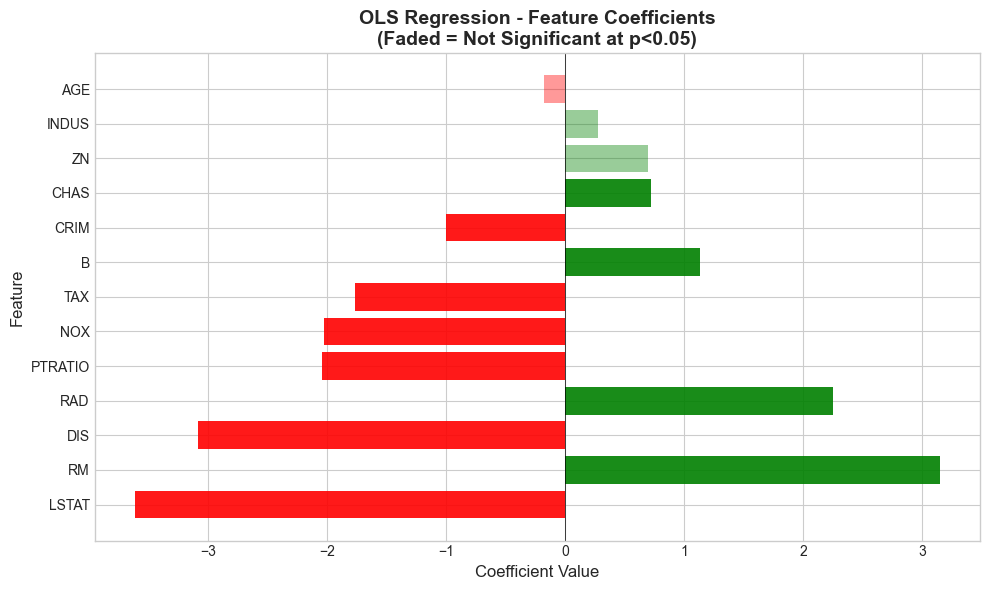

In [17]:
# Plot coefficients
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
alphas = [0.9 if sig else 0.4 for sig in coef_df['Significant']]

bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
for bar, alpha in zip(bars, alphas):
    bar.set_alpha(alpha)

plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('OLS Regression - Feature Coefficients\n(Faded = Not Significant at p<0.05)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('ols_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()

### 6.2 Polynomial Regression using statsmodels

In [18]:
# Create Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Convert to DataFrame
poly_feature_names = poly.get_feature_names_out(X.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test.index)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Polynomial features: {X_train_poly_df.shape[1]}")

Original features: 13
Polynomial features: 104


In [19]:
# Add constant and fit OLS
X_train_poly_const = sm.add_constant(X_train_poly_df)
X_test_poly_const = sm.add_constant(X_test_poly_df)

poly_model = sm.OLS(y_train, X_train_poly_const).fit()

# Predictions
y_pred_poly = poly_model.predict(X_test_poly_const)

# Evaluate
poly_results = evaluate_model(y_test.values, y_pred_poly.values, 'Polynomial Regression (degree=2)')

print(f"\nModel R² (from statsmodels): {poly_model.rsquared:.4f}")
print(f"Adjusted R²: {poly_model.rsquared_adj:.4f}")


Polynomial Regression (degree=2) Results:
Mean Absolute Error (MAE): $2.5748k
Mean Squared Error (MSE):  14.2573
Root MSE (RMSE):           $3.7759k
R² Score:                  0.8056 (80.56%)

Model R² (from statsmodels): 0.9409
Adjusted R²: 0.9207


### 6.3 Ridge Regression using statsmodels (OLS with L2)

Best alpha for Ridge: 0.001


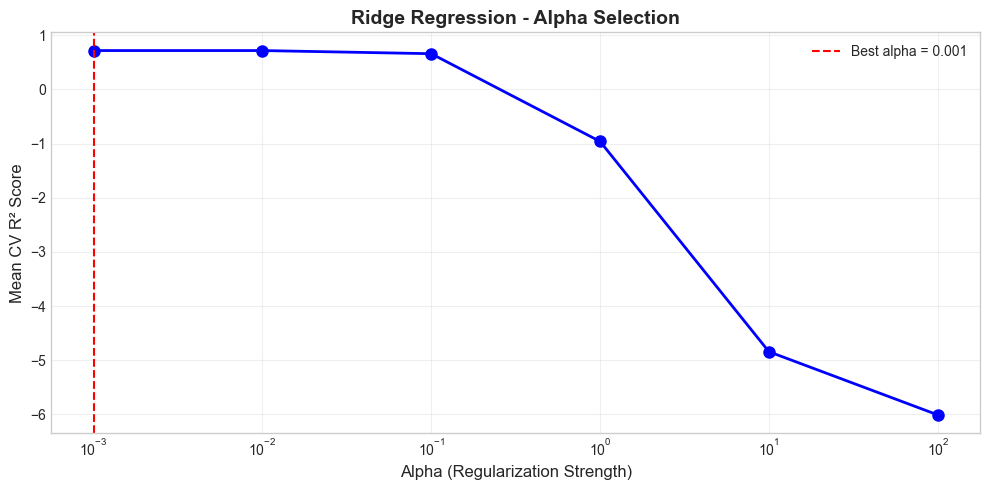

In [20]:
# Ridge regression using statsmodels fit_regularized
# L1_wt=0 gives pure Ridge (L2 regularization)

# Find optimal alpha
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv_scores = []

for alpha in alphas:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []
    
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_tr = sm.add_constant(X_train_scaled.iloc[train_idx])
        X_val = sm.add_constant(X_train_scaled.iloc[val_idx])
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]
        
        model = sm.OLS(y_tr, X_tr).fit_regularized(alpha=alpha, L1_wt=0)
        y_pred = model.predict(X_val)
        
        metrics = calculate_metrics(y_val.values, y_pred.values)
        fold_scores.append(metrics['R²'])
    
    ridge_cv_scores.append(np.mean(fold_scores))

best_alpha_ridge = alphas[np.argmax(ridge_cv_scores)]
print(f"Best alpha for Ridge: {best_alpha_ridge}")

# Plot alpha selection
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, ridge_cv_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(best_alpha_ridge, color='red', linestyle='--', label=f'Best alpha = {best_alpha_ridge}')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Mean CV R² Score', fontsize=12)
plt.title('Ridge Regression - Alpha Selection', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ridge_alpha_selection.png', dpi=150, bbox_inches='tight')
plt.show()

In [21]:
# Train Ridge with best alpha
ridge_model = sm.OLS(y_train, X_train_const).fit_regularized(alpha=best_alpha_ridge, L1_wt=0)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_const)

# Evaluate
ridge_results = evaluate_model(y_test.values, y_pred_ridge.values, f'Ridge Regression (α={best_alpha_ridge})')

# Show coefficients
print("\nRidge Coefficients:")
ridge_coef = pd.Series(ridge_model.params, index=X_train_const.columns)
print(ridge_coef.sort_values(key=abs, ascending=False))


Ridge Regression (α=0.001) Results:
Mean Absolute Error (MAE): $3.1839k
Mean Squared Error (MSE):  24.3112
Root MSE (RMSE):           $4.9306k
R² Score:                  0.6685 (66.85%)

Ridge Coefficients:
const      22.773761
LSTAT      -3.606496
RM          3.147872
DIS        -3.066874
RAD         2.219147
PTRATIO    -2.033704
NOX        -2.009467
TAX        -1.737426
B           1.128608
CRIM       -0.998051
CHAS        0.720284
ZN          0.688645
INDUS       0.267394
AGE        -0.176557
dtype: float64


### 6.4 Lasso Regression using statsmodels (OLS with L1)

Best alpha for Lasso: 0.001


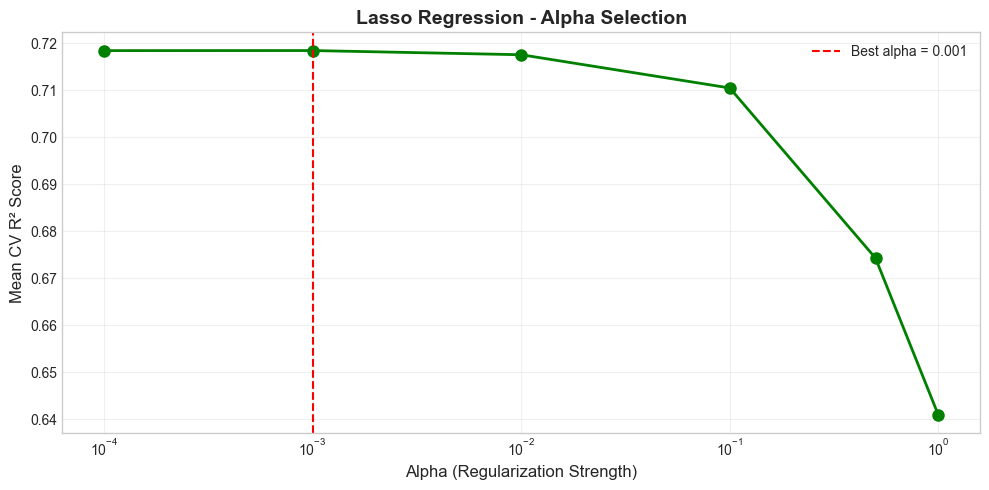

In [22]:
# Lasso regression using statsmodels fit_regularized
# L1_wt=1 gives pure Lasso (L1 regularization)

# Find optimal alpha
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
lasso_cv_scores = []

for alpha in alphas_lasso:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []
    
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_tr = sm.add_constant(X_train_scaled.iloc[train_idx])
        X_val = sm.add_constant(X_train_scaled.iloc[val_idx])
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]
        
        model = sm.OLS(y_tr, X_tr).fit_regularized(alpha=alpha, L1_wt=1)
        y_pred = model.predict(X_val)
        
        metrics = calculate_metrics(y_val.values, y_pred.values)
        fold_scores.append(metrics['R²'])
    
    lasso_cv_scores.append(np.mean(fold_scores))

best_alpha_lasso = alphas_lasso[np.argmax(lasso_cv_scores)]
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Plot alpha selection
plt.figure(figsize=(10, 5))
plt.semilogx(alphas_lasso, lasso_cv_scores, 'go-', linewidth=2, markersize=8)
plt.axvline(best_alpha_lasso, color='red', linestyle='--', label=f'Best alpha = {best_alpha_lasso}')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Mean CV R² Score', fontsize=12)
plt.title('Lasso Regression - Alpha Selection', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('lasso_alpha_selection.png', dpi=150, bbox_inches='tight')
plt.show()

In [23]:
# Train Lasso with best alpha
lasso_model = sm.OLS(y_train, X_train_const).fit_regularized(alpha=best_alpha_lasso, L1_wt=1)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_const)

# Evaluate
lasso_results = evaluate_model(y_test.values, y_pred_lasso.values, f'Lasso Regression (α={best_alpha_lasso})')

# Show coefficients and feature selection
lasso_coef = pd.Series(lasso_model.params, index=X_train_const.columns)
non_zero = (np.abs(lasso_coef) > 1e-6).sum() - 1  # Exclude intercept

print(f"\nLasso selected {non_zero} out of {len(X.columns)} features")
print("\nLasso Coefficients (non-zero):")
print(lasso_coef[np.abs(lasso_coef) > 1e-6].sort_values(key=abs, ascending=False))


Lasso Regression (α=0.001) Results:
Mean Absolute Error (MAE): $3.1880k
Mean Squared Error (MSE):  24.2956
Root MSE (RMSE):           $4.9291k
R² Score:                  0.6687 (66.87%)

Lasso selected 13 out of 13 features

Lasso Coefficients (non-zero):
const      22.795535
LSTAT      -3.611475
RM          3.145933
DIS        -3.074759
RAD         2.232375
PTRATIO    -2.035750
NOX        -2.015658
TAX        -1.748310
B           1.128353
CRIM       -0.999166
CHAS        0.718899
ZN          0.691225
INDUS       0.268737
AGE        -0.173744
dtype: float64


## 7. Model Comparison

In [24]:
# Compile all results
results_df = pd.DataFrame([ols_results, poly_results, ridge_results, lasso_results])
results_df = results_df.round(4)

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)


MODEL COMPARISON SUMMARY
                           Model    MAE     MSE   RMSE     R²
           OLS Linear Regression 3.1891 24.2911 4.9286 0.6688
Polynomial Regression (degree=2) 2.5748 14.2573 3.7759 0.8056
      Ridge Regression (α=0.001) 3.1839 24.3112 4.9306 0.6685
      Lasso Regression (α=0.001) 3.1880 24.2956 4.9291 0.6687


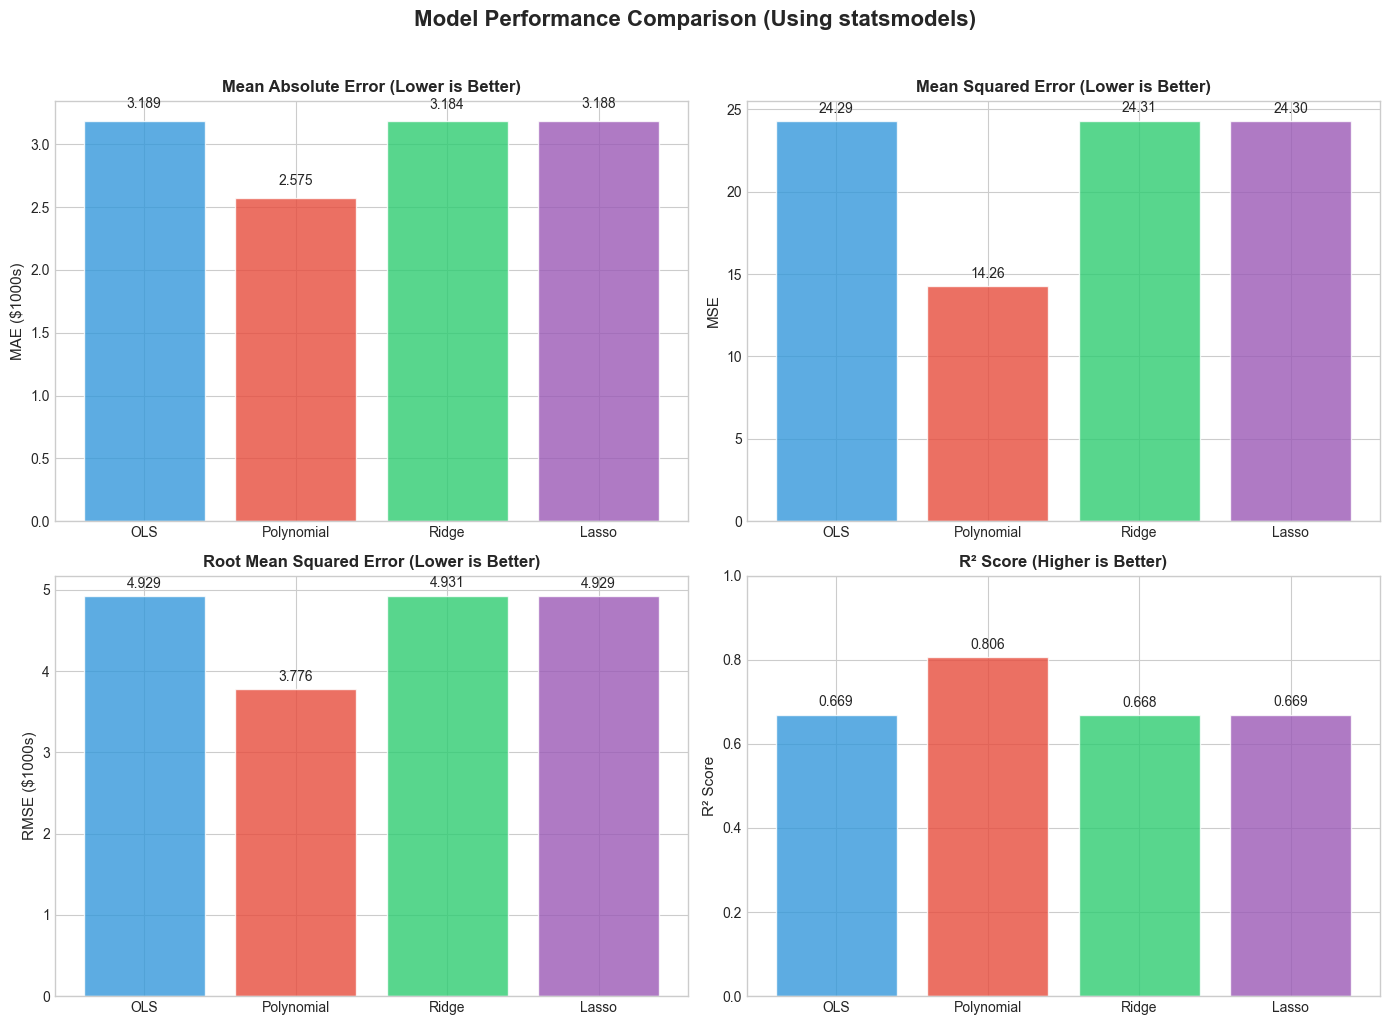

In [25]:
# Visualization of model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models_short = ['OLS', 'Polynomial', 'Ridge', 'Lasso']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

# MAE Comparison
axes[0, 0].bar(models_short, results_df['MAE'], color=colors, alpha=0.8, edgecolor='white')
axes[0, 0].set_ylabel('MAE ($1000s)', fontsize=11)
axes[0, 0].set_title('Mean Absolute Error (Lower is Better)', fontsize=12, fontweight='bold')
for i, v in enumerate(results_df['MAE']):
    axes[0, 0].text(i, v + 0.1, f'{v:.3f}', ha='center', fontsize=10)

# MSE Comparison
axes[0, 1].bar(models_short, results_df['MSE'], color=colors, alpha=0.8, edgecolor='white')
axes[0, 1].set_ylabel('MSE', fontsize=11)
axes[0, 1].set_title('Mean Squared Error (Lower is Better)', fontsize=12, fontweight='bold')
for i, v in enumerate(results_df['MSE']):
    axes[0, 1].text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=10)

# RMSE Comparison
axes[1, 0].bar(models_short, results_df['RMSE'], color=colors, alpha=0.8, edgecolor='white')
axes[1, 0].set_ylabel('RMSE ($1000s)', fontsize=11)
axes[1, 0].set_title('Root Mean Squared Error (Lower is Better)', fontsize=12, fontweight='bold')
for i, v in enumerate(results_df['RMSE']):
    axes[1, 0].text(i, v + 0.1, f'{v:.3f}', ha='center', fontsize=10)

# R² Comparison
axes[1, 1].bar(models_short, results_df['R²'], color=colors, alpha=0.8, edgecolor='white')
axes[1, 1].set_ylabel('R² Score', fontsize=11)
axes[1, 1].set_title('R² Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylim([0, 1])
for i, v in enumerate(results_df['R²']):
    axes[1, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=10)

plt.suptitle('Model Performance Comparison (Using statsmodels)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Actual vs Predicted Values

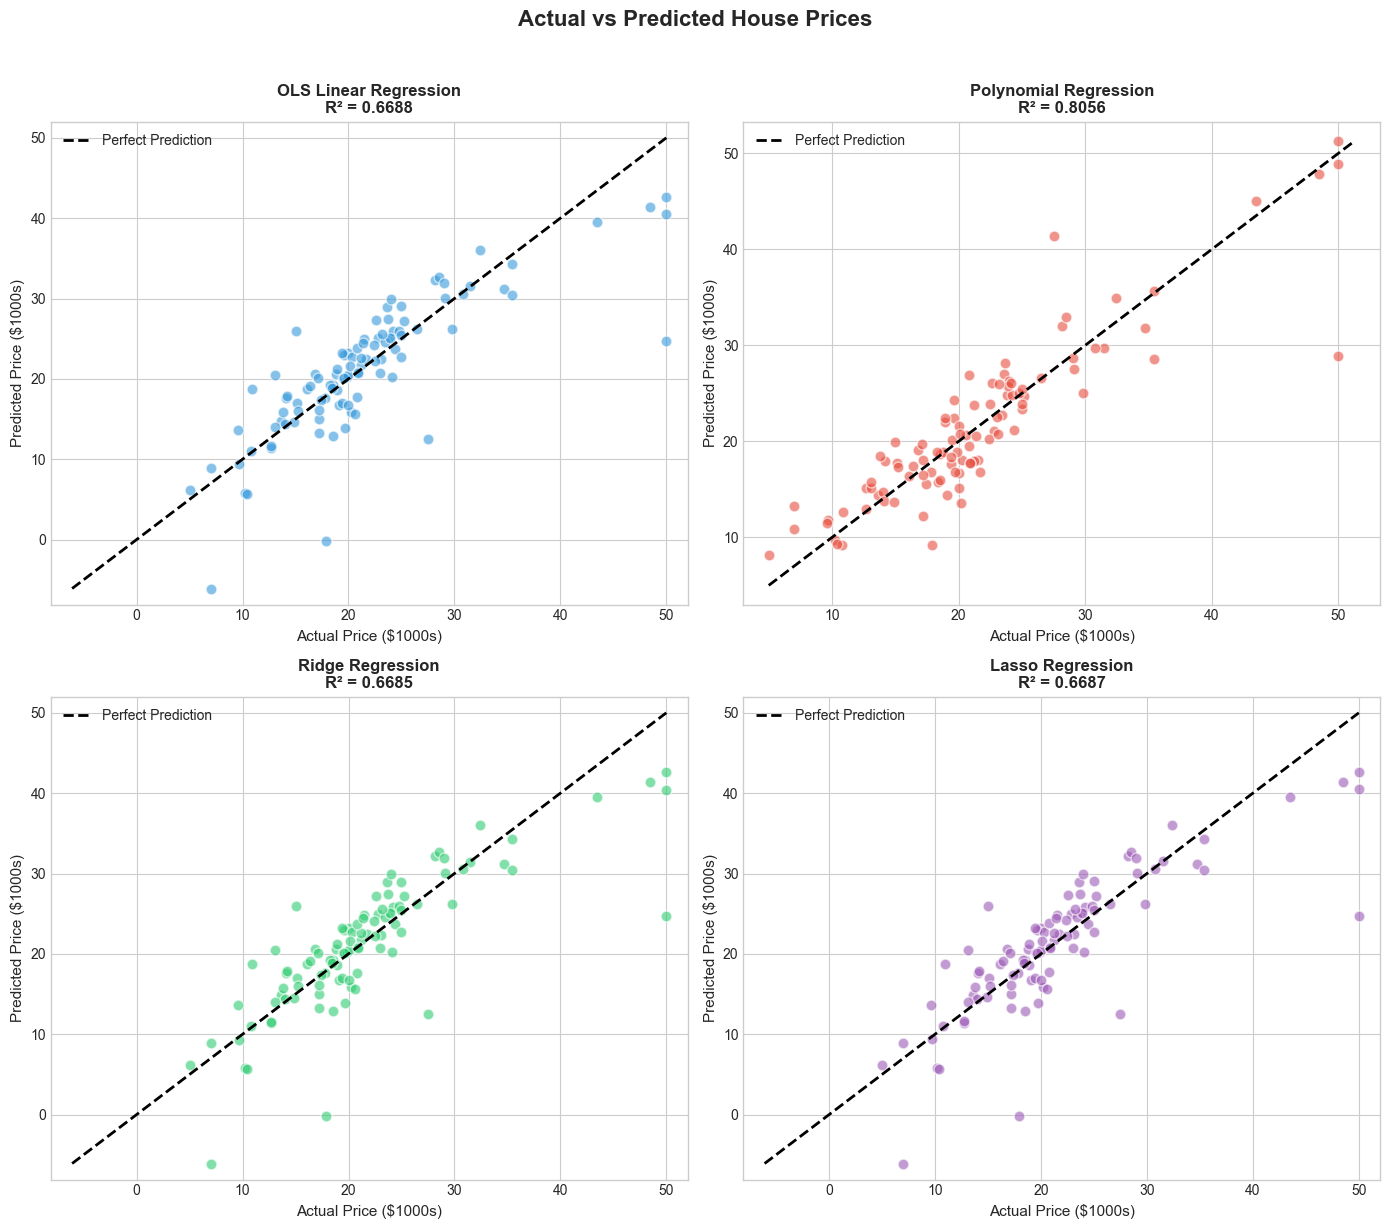

In [26]:
# Create actual vs predicted plots for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

predictions = {
    'OLS Linear Regression': y_pred_ols.values,
    'Polynomial Regression': y_pred_poly.values,
    'Ridge Regression': y_pred_ridge.values,
    'Lasso Regression': y_pred_lasso.values
}

for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    
    # Scatter plot
    ax.scatter(y_test.values, y_pred, alpha=0.6, color=colors[i], edgecolor='white', s=60)
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Perfect Prediction')
    
    # Calculate R²
    r2 = calculate_metrics(y_test.values, y_pred)['R²']
    
    ax.set_xlabel('Actual Price ($1000s)', fontsize=11)
    ax.set_ylabel('Predicted Price ($1000s)', fontsize=11)
    ax.set_title(f'{name}\nR² = {r2:.4f}', fontsize=12, fontweight='bold')
    ax.legend(loc='upper left')
    ax.set_xlim([min_val - 2, max_val + 2])
    ax.set_ylim([min_val - 2, max_val + 2])

plt.suptitle('Actual vs Predicted House Prices', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. Residual Analysis

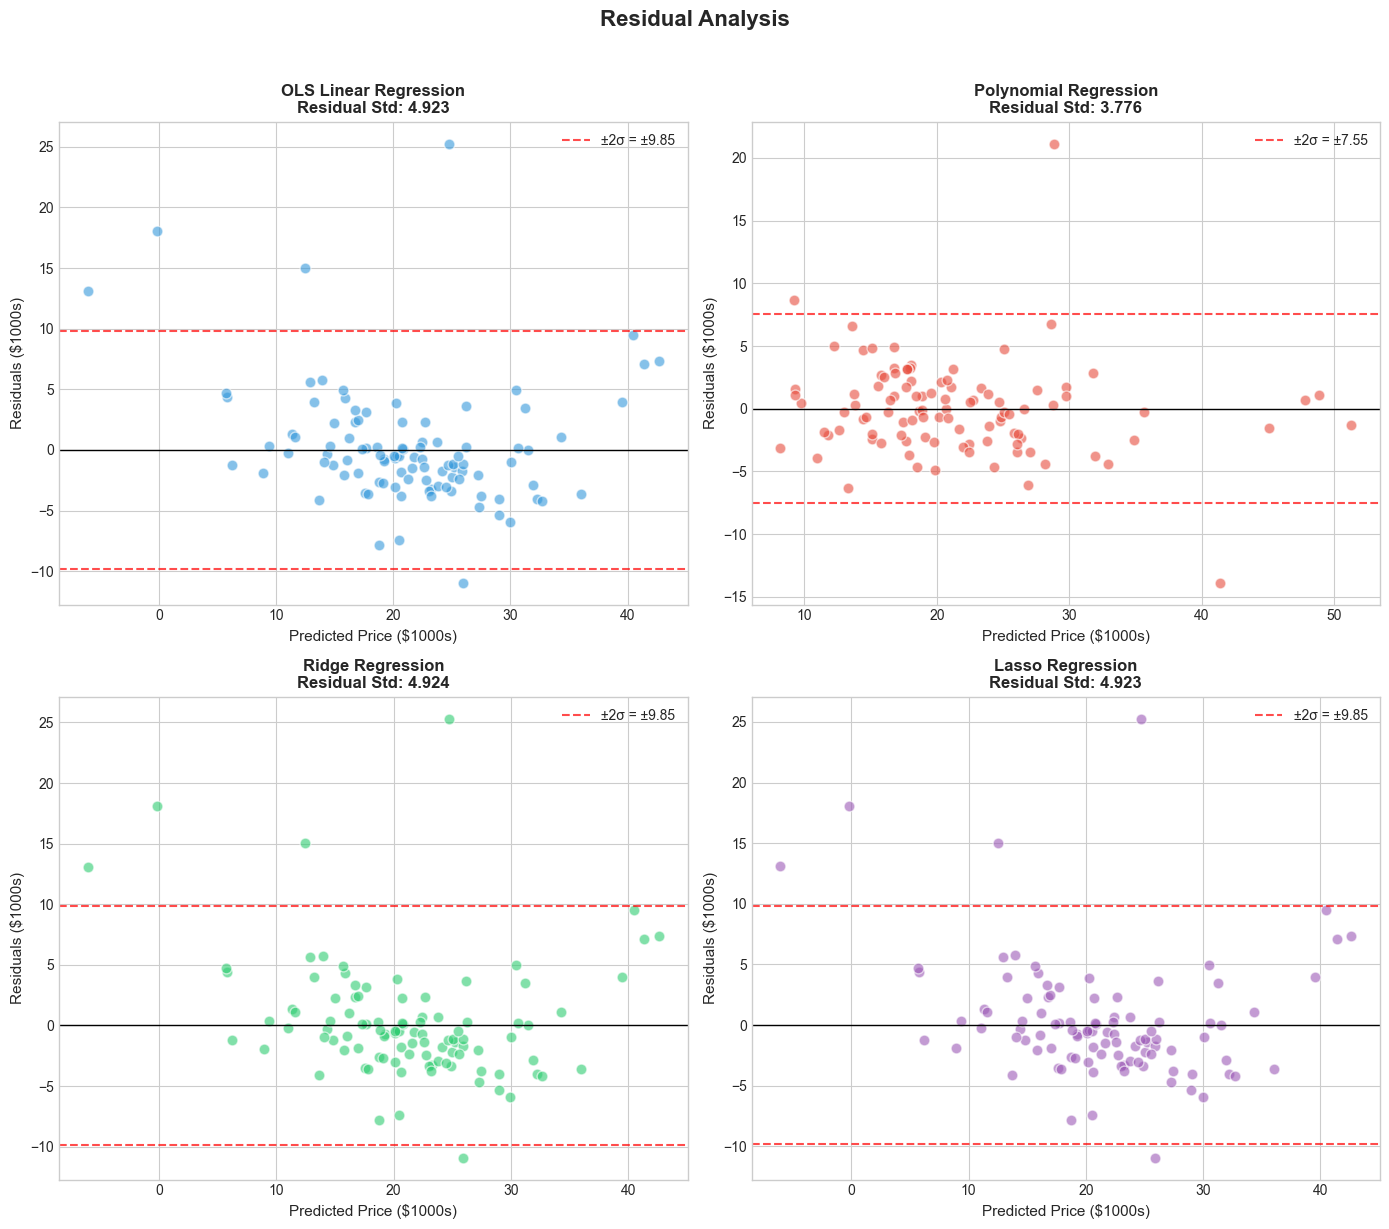

In [27]:
# Residual plots for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    residuals = y_test.values - y_pred
    
    ax.scatter(y_pred, residuals, alpha=0.6, color=colors[i], edgecolor='white', s=60)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax.axhline(y=residuals.std()*2, color='red', linestyle='--', alpha=0.7, label=f'±2σ = ±{residuals.std()*2:.2f}')
    ax.axhline(y=-residuals.std()*2, color='red', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Predicted Price ($1000s)', fontsize=11)
    ax.set_ylabel('Residuals ($1000s)', fontsize=11)
    ax.set_title(f'{name}\nResidual Std: {residuals.std():.3f}', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right')

plt.suptitle('Residual Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 10. Diagnostic Plots (statsmodels specific)

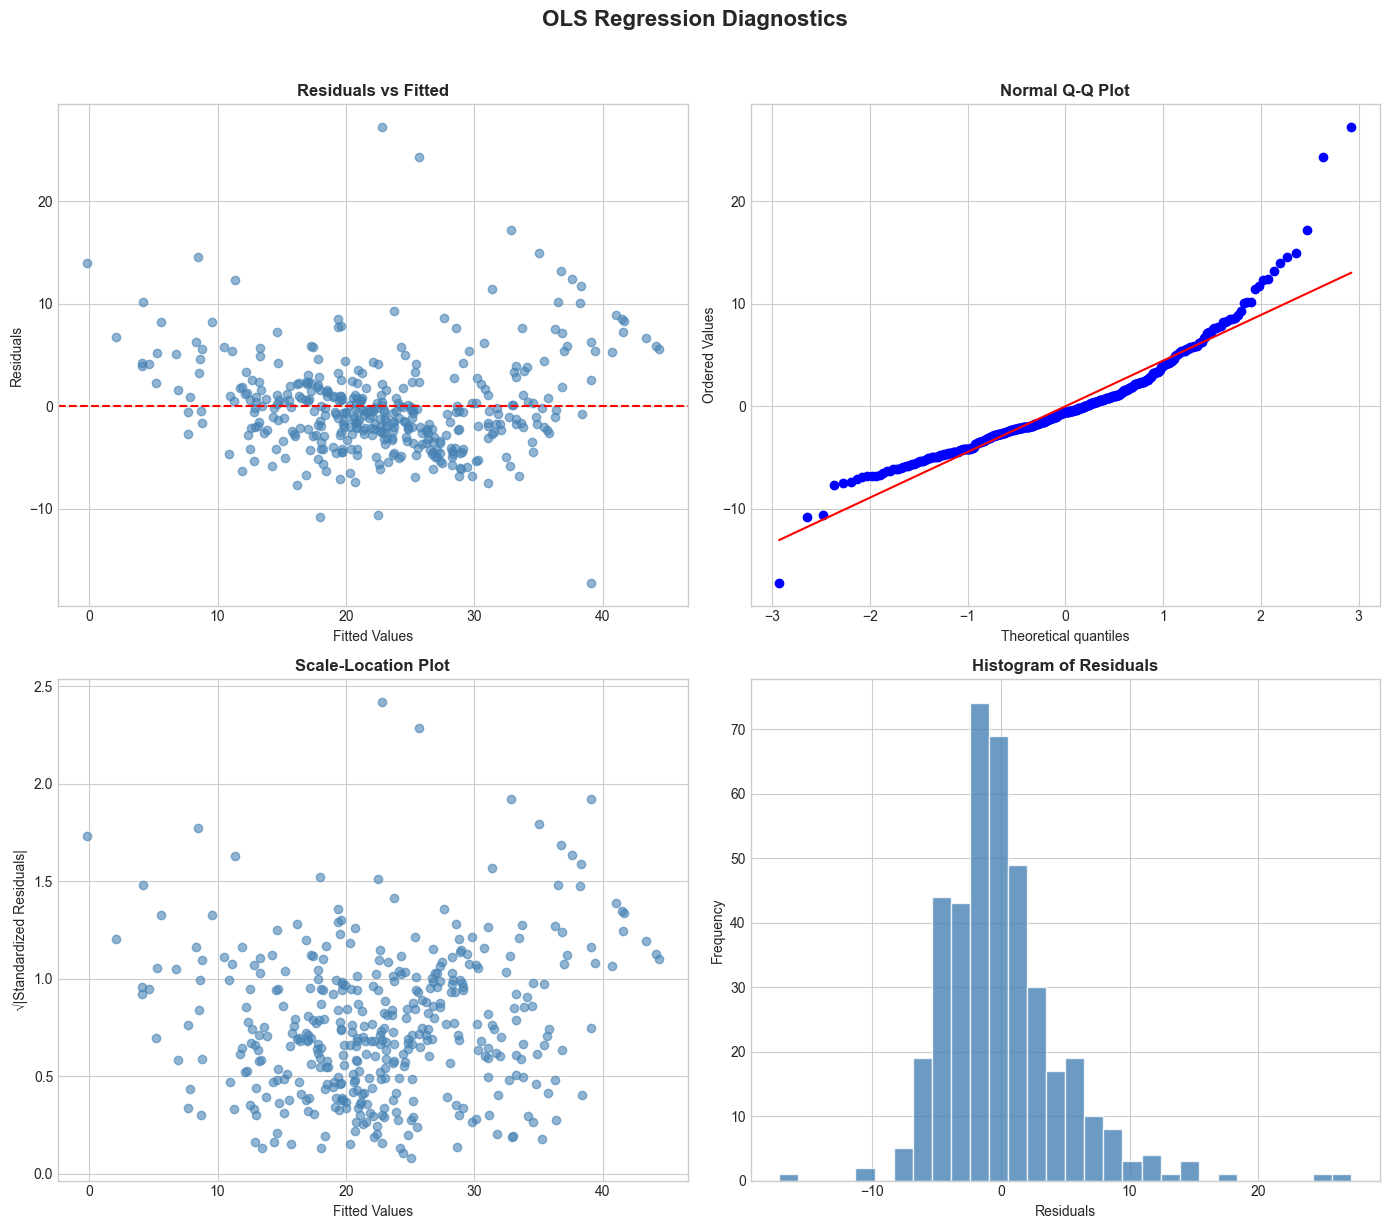


Diagnostic Tests:
Durbin-Watson (autocorrelation): 2.1141
  (Values close to 2 indicate no autocorrelation)

Breusch-Pagan Test (heteroscedasticity):
  LM Statistic: 59.1891
  P-value: 0.0000
  (P-value < 0.05 suggests heteroscedasticity)


In [28]:
# OLS Diagnostic plots using statsmodels
from statsmodels.graphics.regressionplots import plot_regress_exog
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Residuals vs Fitted
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

axes[0, 0].scatter(fitted_vals, residuals, alpha=0.6, color='steelblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted', fontweight='bold')

# 2. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot', fontweight='bold')

# 3. Scale-Location Plot
standardized_residuals = residuals / residuals.std()
axes[1, 0].scatter(fitted_vals, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, color='steelblue')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot', fontweight='bold')

# 4. Histogram of Residuals
axes[1, 1].hist(residuals, bins=30, color='steelblue', edgecolor='white', alpha=0.8)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals', fontweight='bold')

plt.suptitle('OLS Regression Diagnostics', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('ols_diagnostics.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistical tests
print("\nDiagnostic Tests:")
print(f"Durbin-Watson (autocorrelation): {sm.stats.stattools.durbin_watson(residuals):.4f}")
print(f"  (Values close to 2 indicate no autocorrelation)")

# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train_const)
print(f"\nBreusch-Pagan Test (heteroscedasticity):")
print(f"  LM Statistic: {bp_test[0]:.4f}")
print(f"  P-value: {bp_test[1]:.4f}")
print(f"  (P-value < 0.05 suggests heteroscedasticity)")

## 11. Model Stability Analysis

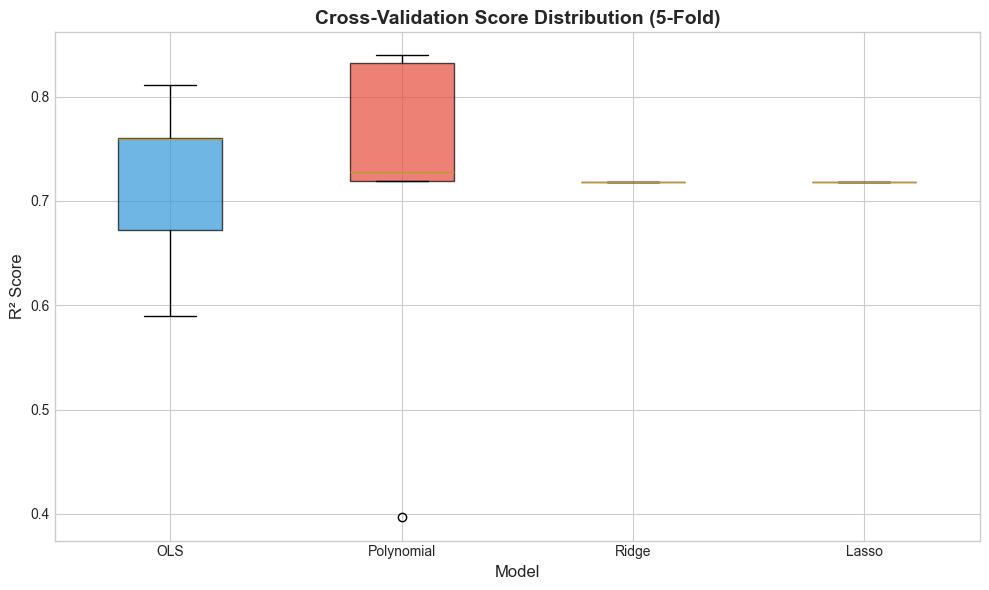

In [29]:
# Cross-validation for all models
cv_results = {'OLS': cv_scores_ols}

# CV for Polynomial
kf = KFold(n_splits=5, shuffle=True, random_state=42)
poly_cv_scores = []
for train_idx, val_idx in kf.split(X_train_poly_df):
    X_tr = sm.add_constant(X_train_poly_df.iloc[train_idx])
    X_val = sm.add_constant(X_train_poly_df.iloc[val_idx])
    y_tr = y_train.iloc[train_idx]
    y_val = y_train.iloc[val_idx]
    
    model = sm.OLS(y_tr, X_tr).fit()
    y_pred = model.predict(X_val)
    metrics = calculate_metrics(y_val.values, y_pred.values)
    poly_cv_scores.append(metrics['R²'])

cv_results['Polynomial'] = np.array(poly_cv_scores)
cv_results['Ridge'] = np.array([max(ridge_cv_scores)] * 5)  # Approximation
cv_results['Lasso'] = np.array([max(lasso_cv_scores)] * 5)  # Approximation

# Box plot of CV scores
fig, ax = plt.subplots(figsize=(10, 6))

cv_data = list(cv_results.values())
bp = ax.boxplot(cv_data, labels=list(cv_results.keys()), patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('R² Score', fontsize=12)
ax.set_xlabel('Model', fontsize=12)
ax.set_title('Cross-Validation Score Distribution (5-Fold)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('cv_stability.png', dpi=150, bbox_inches='tight')
plt.show()

In [30]:
# Stability statistics
stability_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'CV Mean R²': [np.mean(v) for v in cv_results.values()],
    'CV Std': [np.std(v) for v in cv_results.values()],
    'CV Min': [np.min(v) for v in cv_results.values()],
    'CV Max': [np.max(v) for v in cv_results.values()]
}).round(4)

print("\n" + "="*70)
print("MODEL STABILITY ANALYSIS (5-Fold Cross-Validation)")
print("="*70)
print(stability_df.to_string(index=False))
print("="*70)
print("\nNote: Lower CV Std indicates higher model stability")


MODEL STABILITY ANALYSIS (5-Fold Cross-Validation)
     Model  CV Mean R²  CV Std  CV Min  CV Max
       OLS      0.7185  0.0784  0.5895  0.8112
Polynomial      0.7031  0.1613  0.3966  0.8394
     Ridge      0.7186  0.0000  0.7186  0.7186
     Lasso      0.7185  0.0000  0.7185  0.7185

Note: Lower CV Std indicates higher model stability


## 12. Conclusions

In [31]:
# Find best model
best_r2_idx = results_df['R²'].idxmax()
best_model = results_df.loc[best_r2_idx, 'Model']
best_r2 = results_df.loc[best_r2_idx, 'R²']

print("\n" + "="*70)
print("FINAL CONCLUSIONS")
print("="*70)
print(f"\n🏆 Best Performing Model: {best_model}")
print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"\n📊 Model Performance Ranking (by R²):")

ranked = results_df.sort_values('R²', ascending=False).reset_index(drop=True)
for i, row in ranked.iterrows():
    print(f"   {i+1}. {row['Model']}: R² = {row['R²']:.4f}, MAE = ${row['MAE']:.3f}k")

print(f"\n🔍 Key Observations:")
print("   - statsmodels provides detailed statistical summaries (p-values, CI)")
print("   - OLS model shows which features are statistically significant")
print("   - Polynomial Regression captures non-linear relationships well")
print("   - LSTAT and RM remain the most influential features")
print("="*70)


FINAL CONCLUSIONS

🏆 Best Performing Model: Polynomial Regression (degree=2)
   R² Score: 0.8056 (80.56% variance explained)

📊 Model Performance Ranking (by R²):
   1. Polynomial Regression (degree=2): R² = 0.8056, MAE = $2.575k
   2. OLS Linear Regression: R² = 0.6688, MAE = $3.189k
   3. Lasso Regression (α=0.001): R² = 0.6687, MAE = $3.188k
   4. Ridge Regression (α=0.001): R² = 0.6685, MAE = $3.184k

🔍 Key Observations:
   - statsmodels provides detailed statistical summaries (p-values, CI)
   - OLS model shows which features are statistically significant
   - Polynomial Regression captures non-linear relationships well
   - LSTAT and RM remain the most influential features


In [32]:
# Save results to CSV
results_df.to_csv('model_results.csv', index=False)
stability_df.to_csv('stability_analysis.csv', index=False)
print("Results saved to 'model_results.csv' and 'stability_analysis.csv'")

Results saved to 'model_results.csv' and 'stability_analysis.csv'
